## Data preparation

<IPython.core.display.Javascript object>


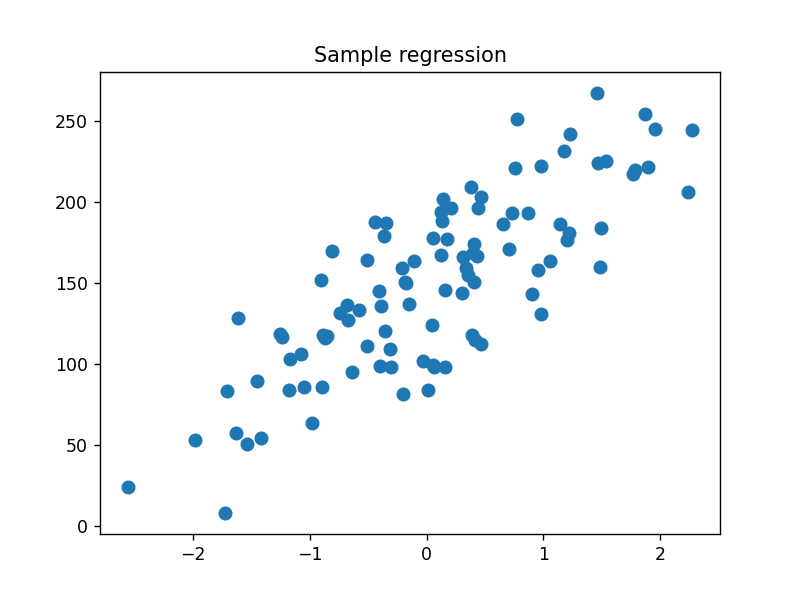

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

np.set_printoptions(precision=2)
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0
                            ,noise=30, random_state=0)
plt.scatter(X_R1,y_R1, marker='o',s=50)
plt.show()

In [3]:
# for classification
fruits = pd.read_table('fruit_data_with_colors.txt')
X_fruits = fruits[['height', 'width', 'mass', 'color_score']]
y_fruits = fruits['fruit_label']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

In [4]:
X_fruits.head()

,height,width,mass,color_score
0,7.3,8.4,192,0.55
1,6.8,8.0,180,0.59
2,7.2,7.4,176,0.60
3,4.7,6.2,86,0.80
4,4.6,6.0,84,0.79


In [5]:
X_cancer

array([[1.80e+01, 1.04e+01, 1.23e+02, ..., 2.65e-01, 4.60e-01, 1.19e-01],
       [2.06e+01, 1.78e+01, 1.33e+02, ..., 1.86e-01, 2.75e-01, 8.90e-02],
       [1.97e+01, 2.12e+01, 1.30e+02, ..., 2.43e-01, 3.61e-01, 8.76e-02],
       ...,
       [1.66e+01, 2.81e+01, 1.08e+02, ..., 1.42e-01, 2.22e-01, 7.82e-02],
       [2.06e+01, 2.93e+01, 1.40e+02, ..., 2.65e-01, 4.09e-01, 1.24e-01],
       [7.76e+00, 2.45e+01, 4.79e+01, ..., 0.00e+00, 2.87e-01, 7.04e-02]])

In [6]:
y_cancer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff(w): {}'.format(linreg.coef_))
print('linear model intercept(b) {:.2f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train,y_train)))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_test,y_test)))

linear model coeff(w): [45.71]
linear model intercept(b) 148.45
R-squared score (training): 0.679
R-squared score (training): 0.492


<IPython.core.display.Javascript object>


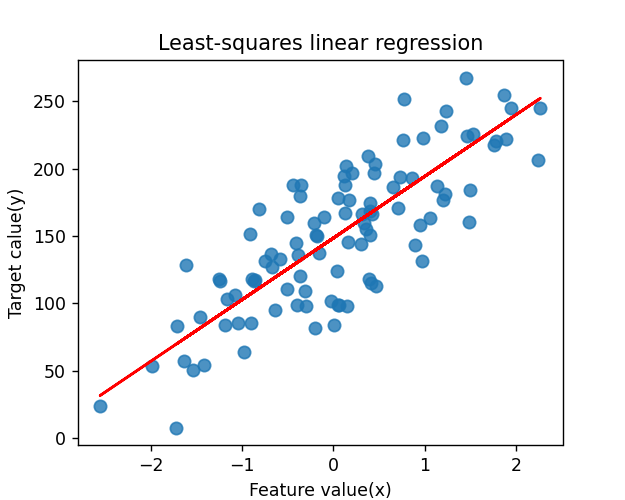

In [8]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1,y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_*X_R1+linreg.intercept_,'-r')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value(x)')
plt.ylabel('Target calue(y)')
plt.show()

## Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

y_fruits_apple = y_fruits_2d == 1
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_apple, 
                                                   random_state=0)

In [10]:
clf = LogisticRegression().fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.75
Accuracy of Logistic regression classifier on training set: 0.67


In [11]:
clf.predict([[6,8]])

array([ True])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, 
                                                   random_state=0)

clf = LogisticRegression().fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on training set: 0.94


C:\Users\aq062\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

In [13]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_apple, 
                                                   random_state=0)

clf = SVC(kernel='linear').fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.84
Accuracy of Logistic regression classifier on training set: 0.67


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, 
                                                   random_state=0)

clf = SVC(kernel='linear').fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.97
Accuracy of Logistic regression classifier on training set: 0.96


## Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_apple, 
                                                   random_state=0)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.67


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, 
                                                   random_state=0)

clf = DecisionTreeClassifier().fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.91


## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d,y_fruits_apple, 
                                                   random_state=0)

clf = RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.67


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, 
                                                   random_state=0)

clf = RandomForestClassifier(max_features=8, n_estimators=10, random_state=0).fit(X_train, y_train)

print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Logistic regression classifier on training set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on training set: 0.99


In [21]:
y_train

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,